In [1]:
import os
from tqdm import tqdm
import random
import numpy as np
import netwulf as nw
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
# if os.getcwd()[-1] in '0123456798':
#     path_parent = os.path.dirname(os.getcwd())
#     os.chdir(path_parent)

In [2]:
stylized_network, config, G = nw.load("Graph.json")

In [3]:
partition = nx_comm.louvain_communities(G)

In [17]:
sizes = []
for i, c in enumerate(partition):
    # print(f'Community {i} has size: {len(c)}')
    sizes.append(len(c))
    # for node in c:
    #     partition_dict[node] = sizes[-1]
print(f'The average community size is {round(np.mean(sizes),2)}, with a standard deviation of {round(np.std(sizes),2)}. The largest is of size {np.max(sizes)} and the smallest {np.min(sizes)}')

The average community size is 50.26, with a standard deviation of 193.12. The largest is of size 2972 and the smallest 1


45188

In [25]:
colours_avail = [(255,0,0), (0,0,255), (0,255,0)]
sizes = np.array(sizes)
indices = np.argsort(sizes)[-len(colours_avail):]
partition_dict = {}

for i, c in enumerate(partition):
    if i in indices:
        col = colours_avail.pop()
    else:
        col = (211,211,211)
    for node in c:
        partition_dict[node] = col

nx.set_node_attributes(G, partition_dict, 'group')

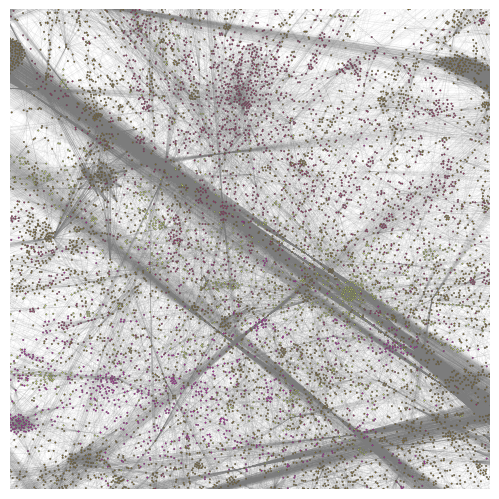

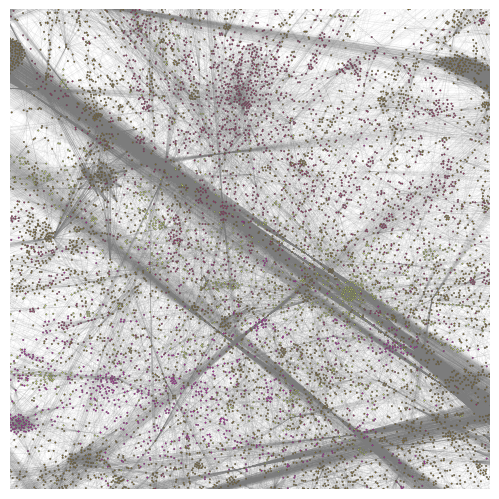

In [26]:
network, config = nw.visualize(G)
fig, ax = nw.draw_netwulf(network)
plt.savefig('Graph_coloured')

In [5]:
N = G.number_of_edges()*2
number_of_iterations = 1000
coms = [list(part) for part in partition]

def modularity(G, communities):
    m = G.number_of_edges()
    q = 0.0
    for c in communities:
        lc = G.subgraph(c).number_of_edges()
        kc = sum(G.degree(n) for n in c)
        q += lc/m - (kc/(2*m))**2
    return q


def double_edge_swap_algo(G_original, N):
    G = G_original.copy()
    for i in range(N):
        u, v = random.choice(list(G.edges()))
        x, y = random.choice(list(G.edges()))

        if (u != x) and (v != y) and (not G.has_edge(u, y)) and (not G.has_edge(x, v)):
            # perform the double edge swap
            G.remove_edges_from([(u, v), (x, y)])
            G.add_edges_from([(u, y), (x, v)])

    return G

def plot_density(modularities, value):
    plt.hist(modularities, bins=50, alpha=0.5, density=True)
    plt.axvline(x=value, color='r')

    plt.xlabel('Modularity')
    plt.ylabel('Density')
    plt.title('Distribution of Random Modularities with Actual Modularity')
    plt.savefig('Modularities')
    plt.show()


def is_significantly_dif_from_zero(G, value):

    print("current modularity = ", value)

    modularities = []
    for i in tqdm(range(number_of_iterations)):
        current_double_edge_swap = double_edge_swap_algo(G, N)
        current_modularity = modularity(current_double_edge_swap, coms)
        modularities.append(current_modularity)

    mean = np.mean(modularities)
    std = np.std(modularities)

    print("mean: ", mean)
    print("std: ", std)

    plot_density(modularities, value)

    if value < mean-2*std or value > mean+2*std:
        print("Value is significantly different")
    else:
        print("Value is not significantly different")

In [ ]:
modularity_from_current_communities = modularity(G, partition)
is_significantly_dif_from_zero(G, modularity_from_current_communities)

current modularity =  0.9231428593851565
